In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle, islice


In [97]:
import datetime as dt
from datetime import datetime, date
import numpy as np
from math import sqrt
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures

## Abro los dataset datos para trabajar

In [1]:
from google.colab import files   
uploaded = files.upload()

Saving bike_train.xlsx to bike_train.xlsx
Saving bike_test.xlsx to bike_test.xlsx


In [98]:
import io 
  
df = pd.read_excel(io.BytesIO(uploaded['bike_test.xlsx'])) 
print(df)

      instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0       12000 2012-05-20       2   1     5   4        0        0           0   
1       12001 2012-05-20       2   1     5   5        0        0           0   
2       12002 2012-05-20       2   1     5   6        0        0           0   
3       12003 2012-05-20       2   1     5   7        0        0           0   
4       12004 2012-05-20       2   1     5   8        0        0           0   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375 2012-12-31       1   1    12  19        0        1           1   
5376    17376 2012-12-31       1   1    12  20        0        1           1   
5377    17377 2012-12-31       1   1    12  21        0        1           1   
5378    17378 2012-12-31       1   1    12  22        0        1           1   
5379    17379 2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  w

In [99]:
df1 = pd.read_excel(io.BytesIO(uploaded['bike_train.xlsx'])) 
print(df1)

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
11994    11995 2012-05-19       2   1     5  23        0        6           0   
11995    11996 2012-05-20       2   1     5   0        0        0           0   
11996    11997 2012-05-20       2   1     5   1        0        0           0   
11997    11998 2012-05-20       2   1     5   2        0        0           0   
11998    11999 2012-05-20       2   1     5   3        0        0           0   

       weathersit  temp   a

## Veo la dimensionalidad de los dataset

In [ ]:
df.shape, df1.shape

((5380, 14), (11999, 17))

## Analizo la informacion de los dataset

In [ ]:
df.head(10)

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   
5    12005 2012-05-20       2   1     5   9        0        0           0   
6    12006 2012-05-20       2   1     5  10        0        0           0   
7    12007 2012-05-20       2   1     5  11        0        0           0   
8    12008 2012-05-20       2   1     5  12        0        0           0   
9    12009 2012-05-20       2   1     5  13        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642  
5           1  0.62  0.6212  0.32     0.2537  
6           1  0.66  0.6212  0.34     0.2985  
7           1  0.66  0.6212  0.36     0.3284  
8           1  0.68  0.6364  0.36     0.3284  
9           1  0.70  0.6364  0.37     0.2836

In [ ]:
df1.head(10)

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   
5        6 2011-01-01       1   0     1   5        0        6           0   
6        7 2011-01-01       1   0     1   6        0        6           0   
7        8 2011-01-01       1   0     1   7        0        6           0   
8        9 2011-01-01       1   0     1   8        0        6           0   
9       10 2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1  
6           1  0.22  0.2727  0.80     0.0000       2           0    2  
7           1  0.20  0.2576  0.86     0.0000       1           2    3  
8           1  0.24  0.2879  0.75     0.0000       1           7    8  
9           1  0.32  0.3485  0.76     0.0000       8           6   14

In [ ]:
df.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed  
count  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968  
std       0.161300     0.174493     0.113988  
min       0.151500     0.160000     0.000000  
25%       0.409100     0.490000     0.104500  
50%       0.575800     0.640000     0.164200  
75%       0.666700     0.780000     0.253700  
max       0.924200     1.000000     0.656700

In [ ]:
df1.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

## Veo los tipos de datos que contienen los dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

## Veo los vacios que traen los dataset

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

In [ ]:
df1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Veo la correlacion en dos heatmap y pairplot, uno para los datos test y otro para los  datos test

### Arrancamos con los datos del df(test)

In [ ]:
import seaborn as sns

<AxesSubplot:>

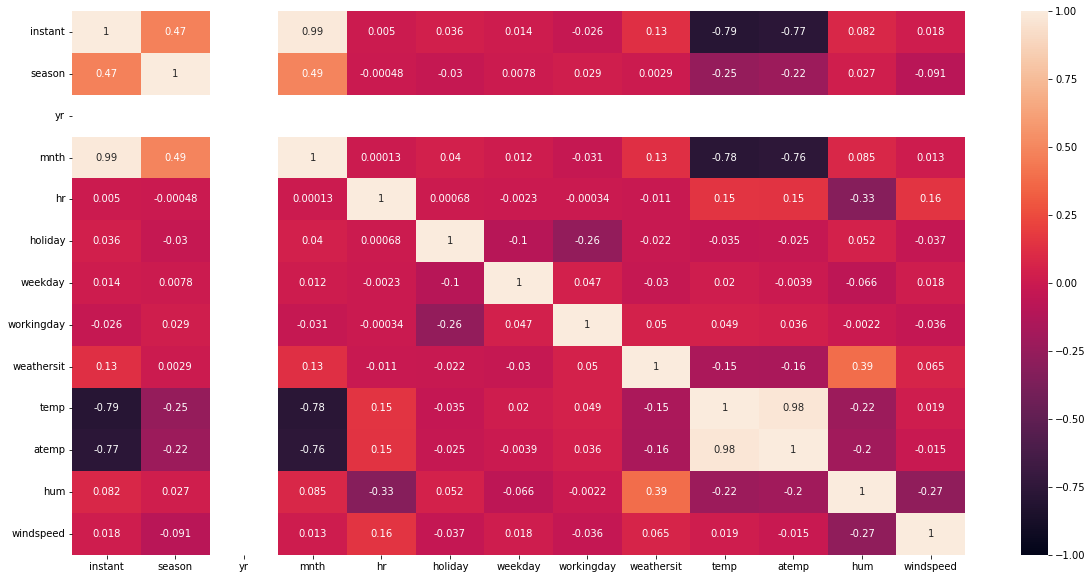

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), vmax = 1, vmin = -1, square = False, annot = True)

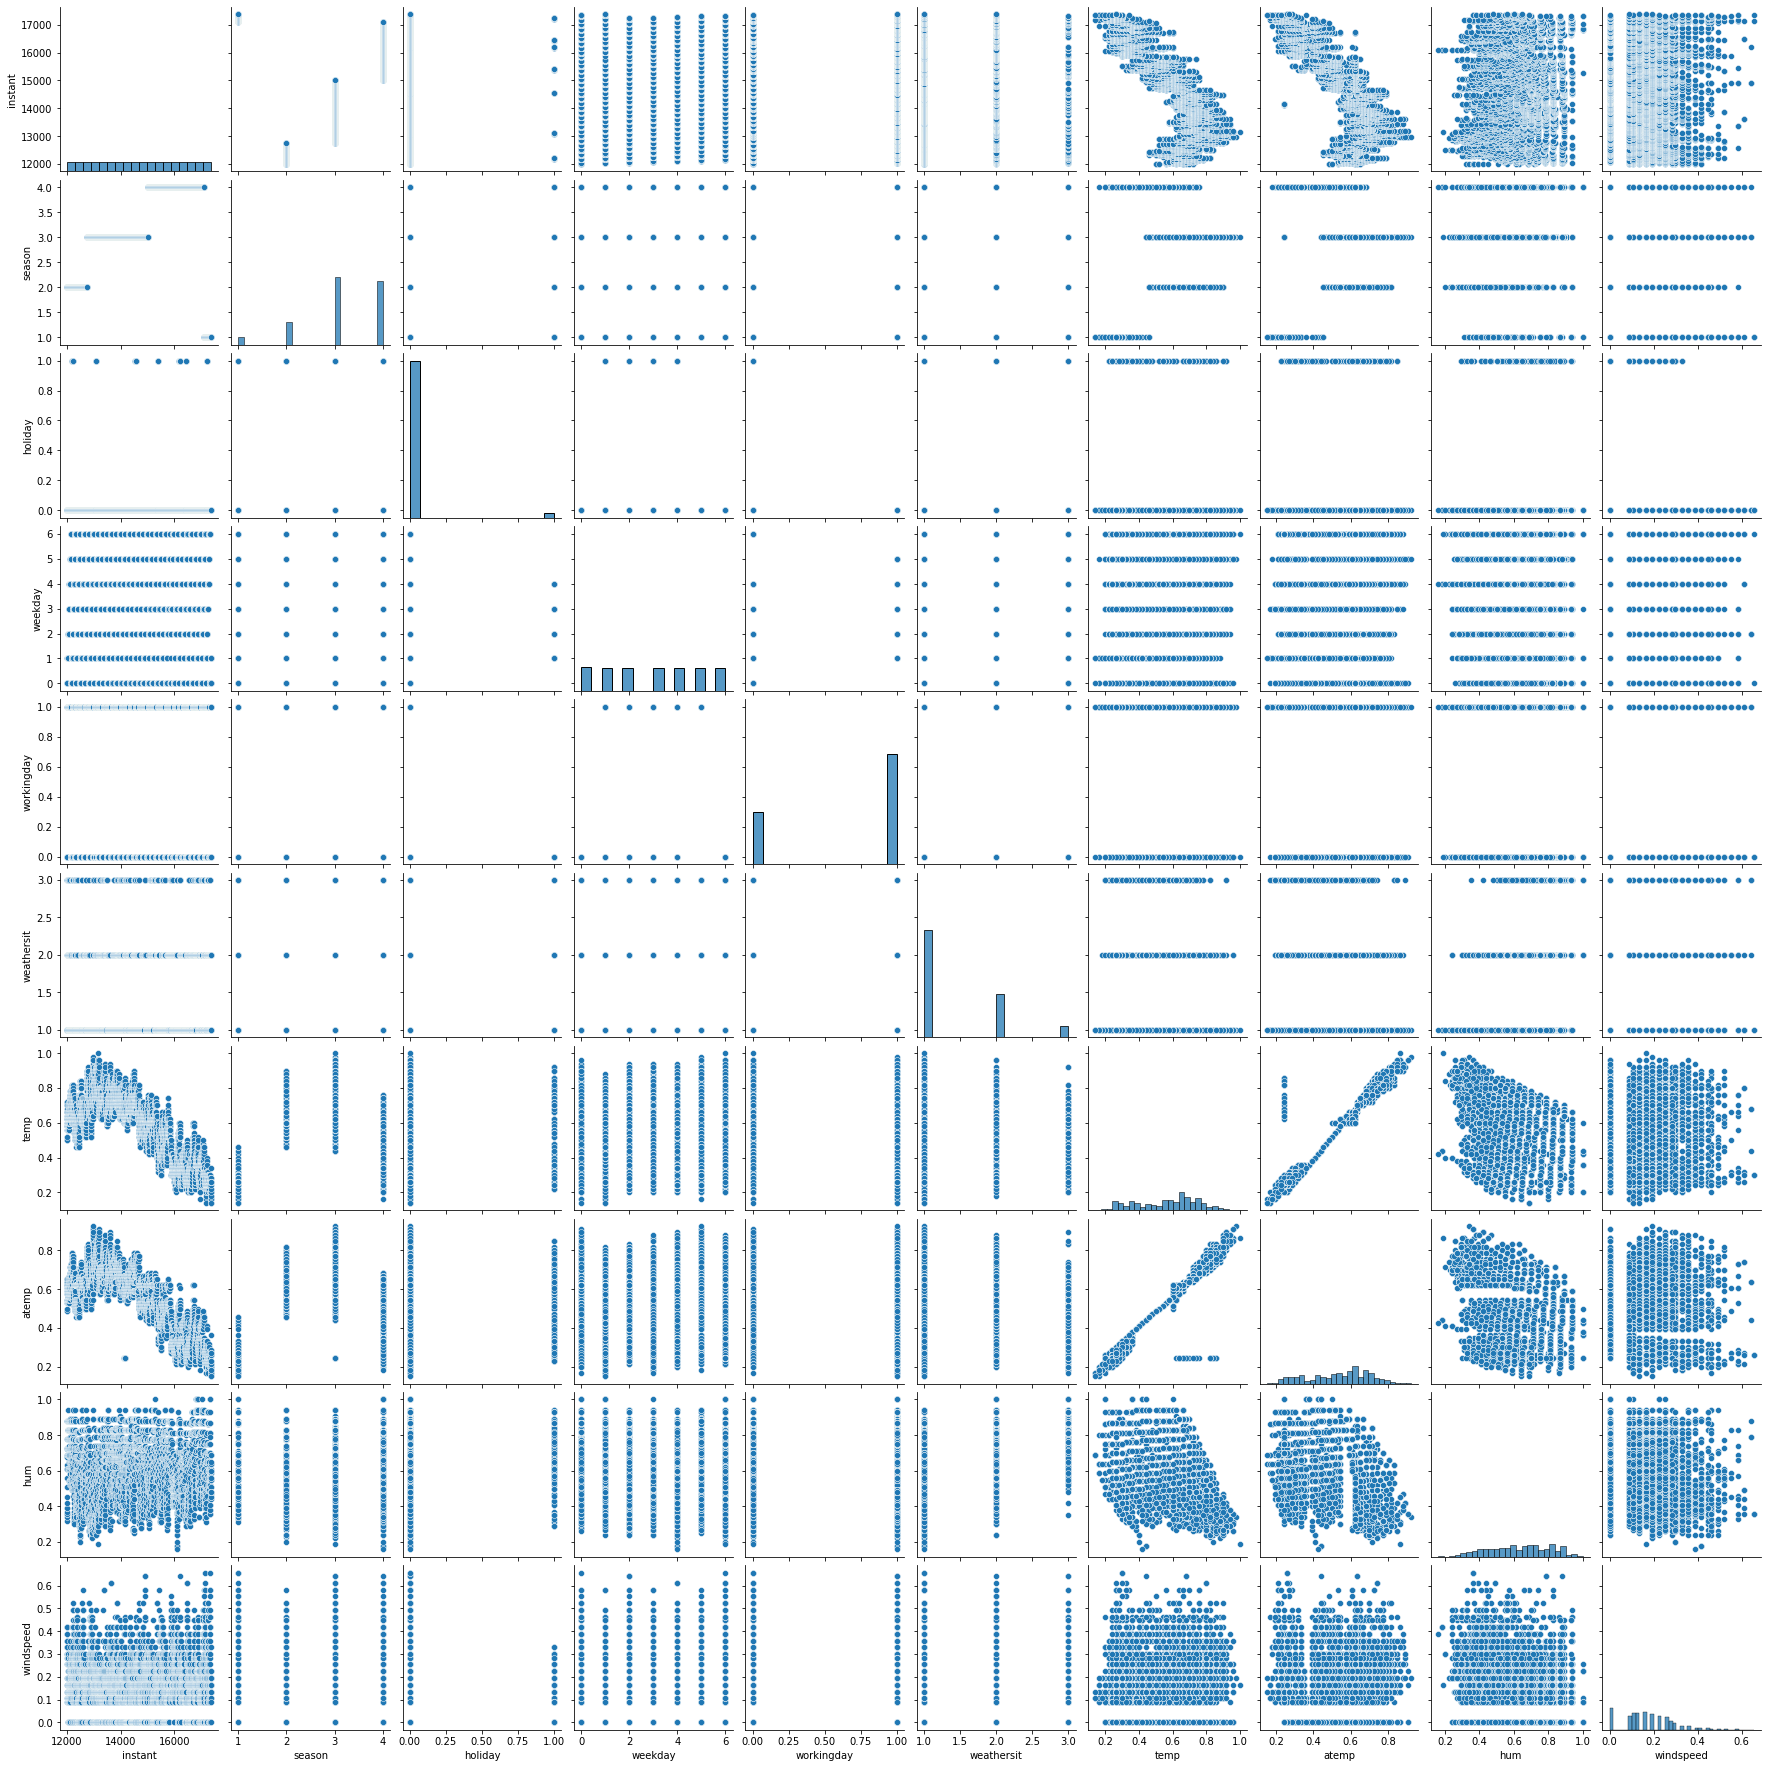

In [ ]:
sns.pairplot(df)

Se puede observar que existe correlaciòn negativa elevada entre instant(nº identificador de resgistro)  atemp y temp (temperatura/sensacion termica)
Entre atemp y temp tambièn existe una correlacion elevada positiva lo cual es esperable, ya que la sensaciòn tèrmica suele ser cercana a la temperatura

### Seguimos con el df1(train)

<AxesSubplot:>

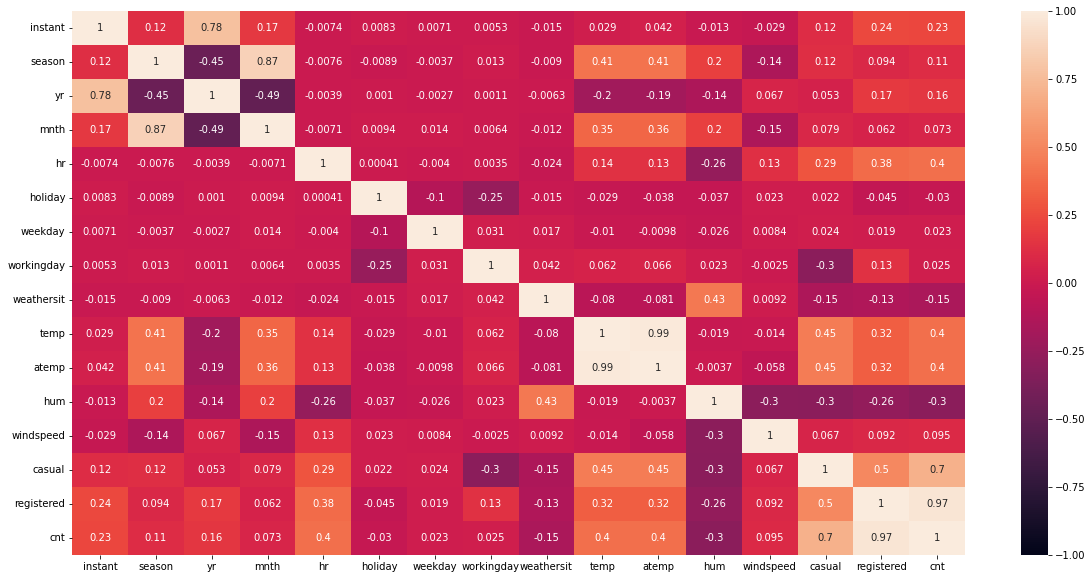

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df1.corr(), vmax = 1, vmin = -1, square = False, annot = True)

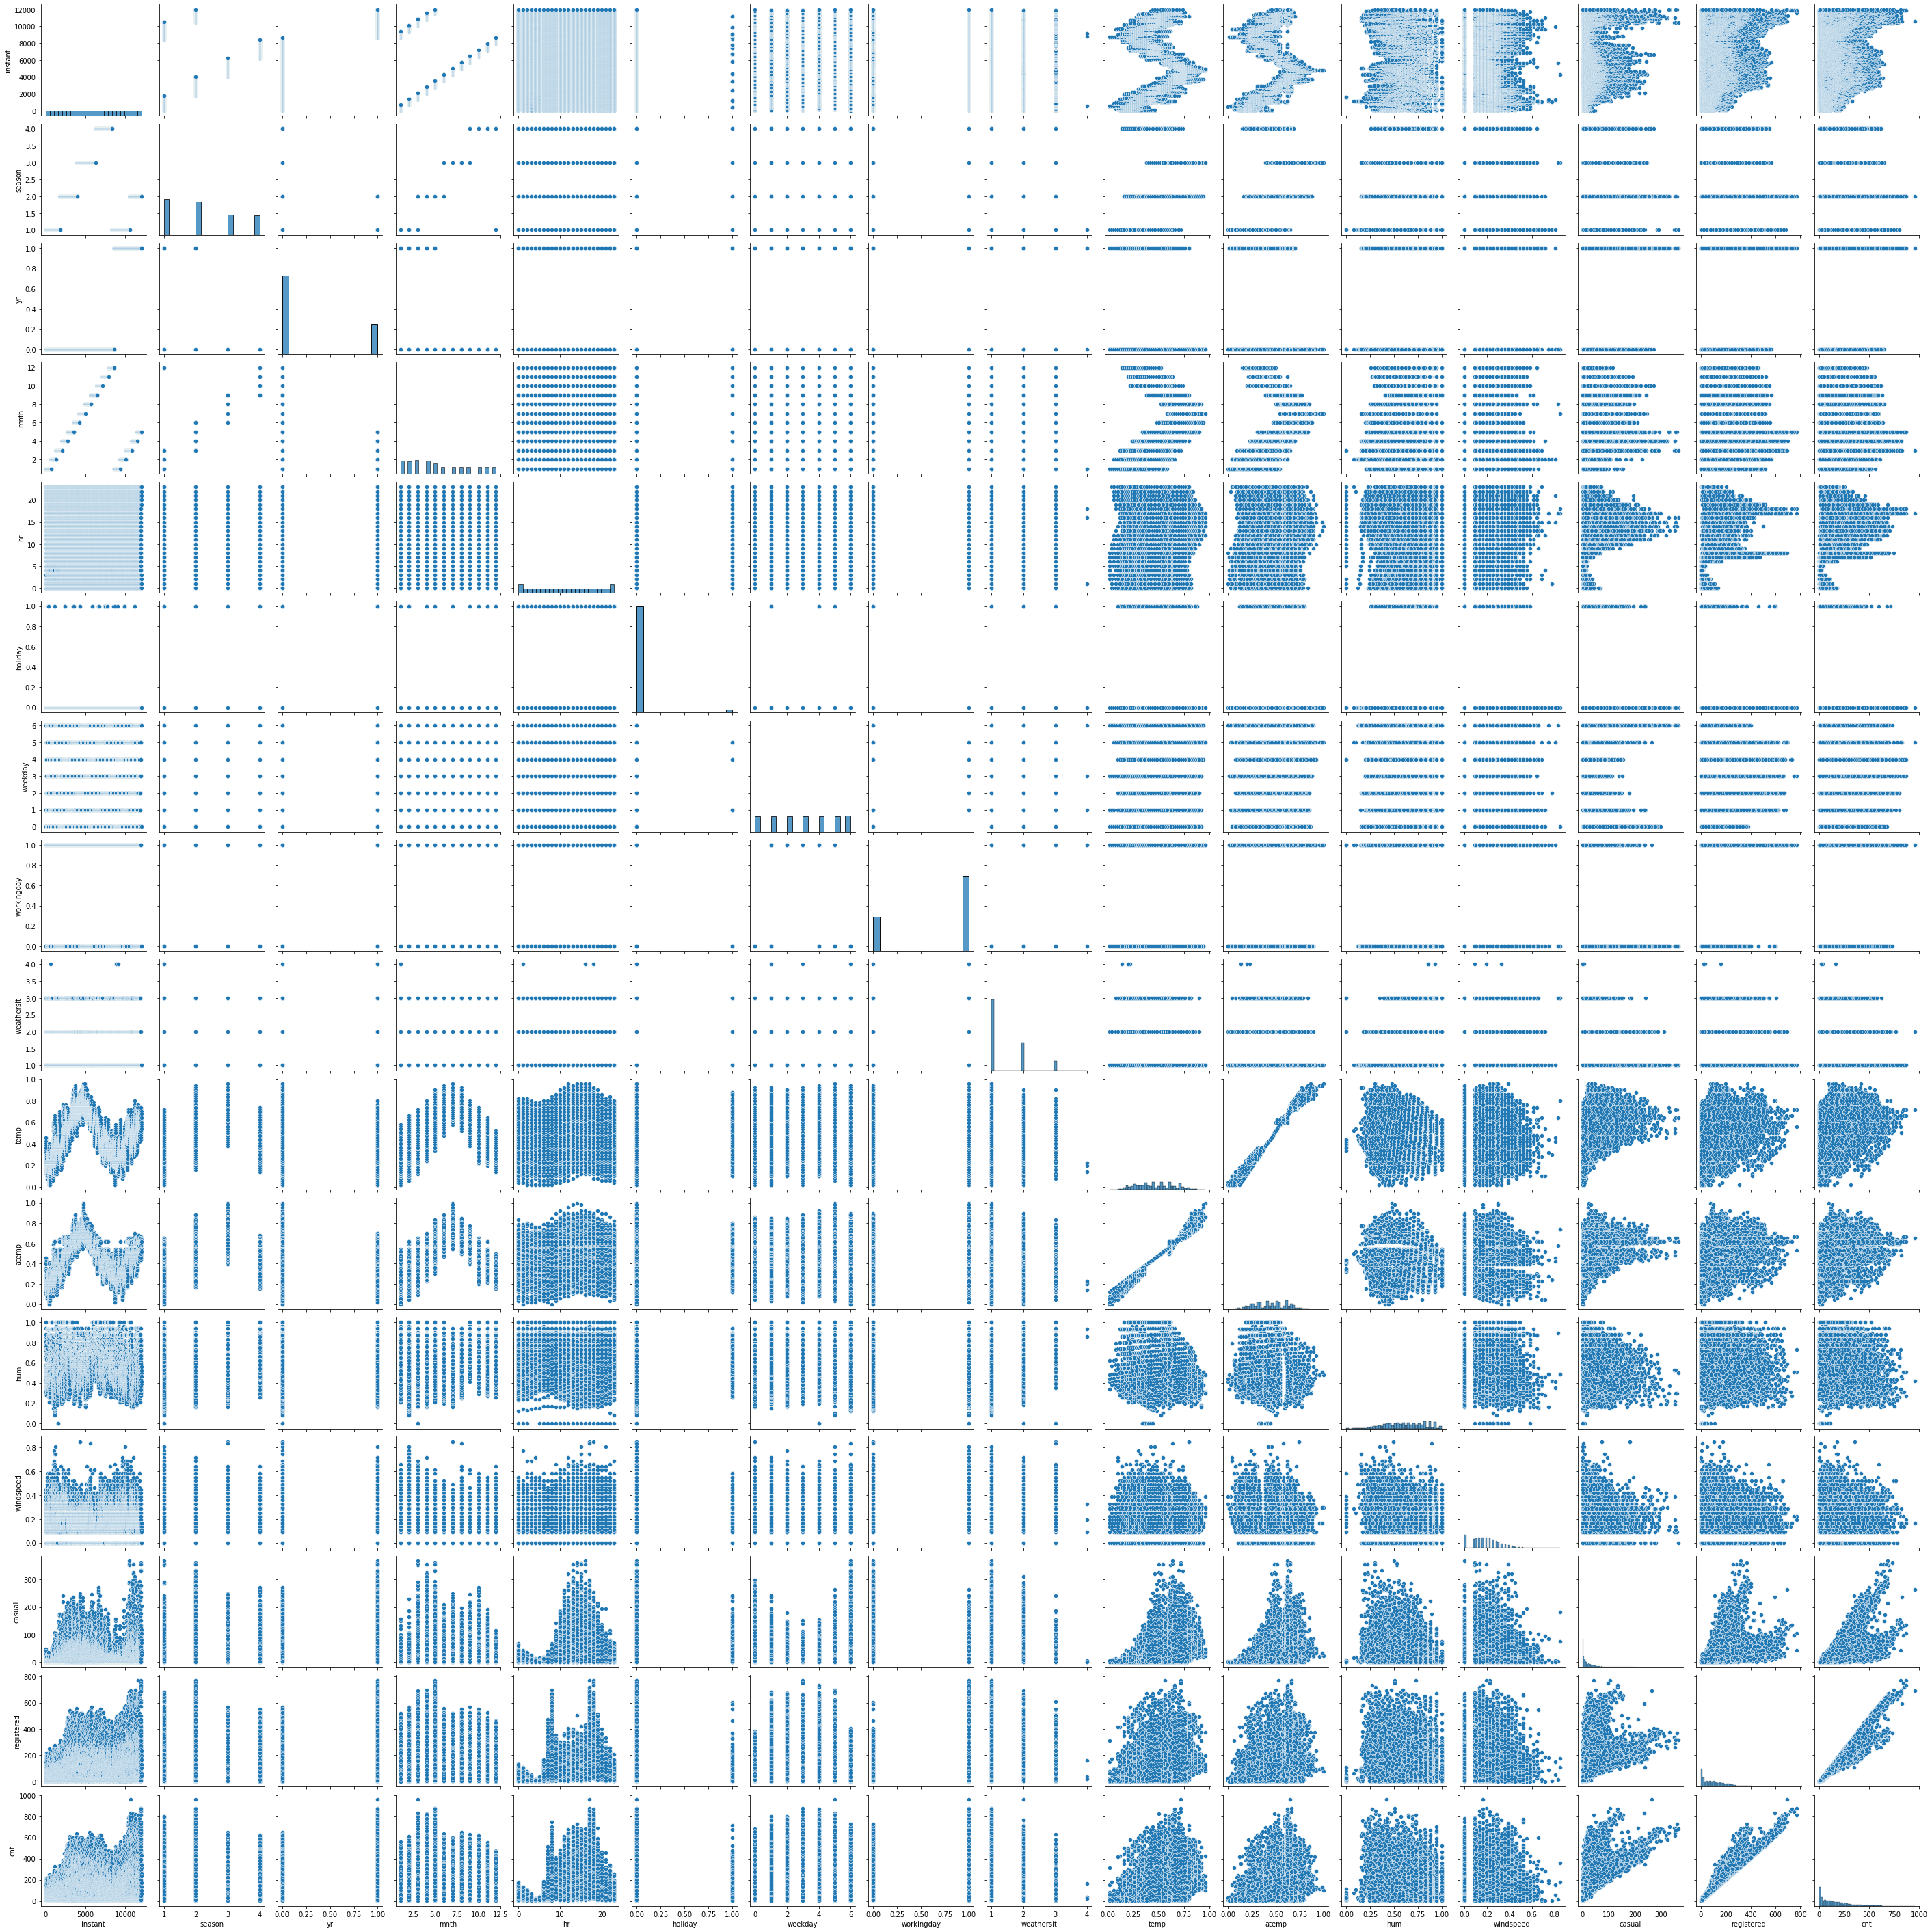

In [ ]:
sns.pairplot(df1)

Aquì se observa que Cnt(cantidad de total de bicicletas rentadas) esta altamente correlacionado de manera positiva con registered(cantidad de usuarios registrados) y casual(cantidad de usuarios casuales). Tambièn podemos ver que existe una correlaciòn positiva elevada  entre mth(mes) y season(temporada) 
Como en el dataset anterior observamos una correlaciòn elevada entre temp(temperatura) y atemp(sensaciòn tèrmica) 
Yr(año) e Instant(nºregistro) tambièn estan correlacionados positivamente    

## Ahora observo la relaciòn entre diferentes variables. Lo hago solo sobre los datos de train puesto que solo este tiene informaciòn de la cantidad de bicicletas rentadas 

Text(0, 0.5, 'cnt')

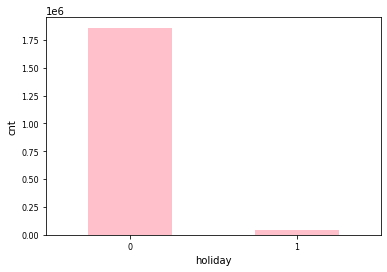

In [18]:
df1.groupby('holiday')['cnt'].sum().plot.bar(color= 'pink')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('holiday')
plt.ylabel('cnt')

In [19]:
df1.holiday.value_counts()

0    11666
1      333
Name: holiday, dtype: int64

Podemos observar que la mayoria de las bicicletas rentadas fueron en dìas hàbiles 

Text(0, 0.5, 'cnt')

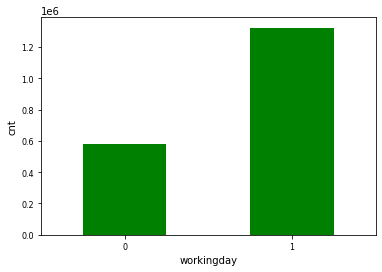

In [20]:
df1.groupby('workingday')['cnt'].sum().plot.bar(color= 'green')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('workingday')
plt.ylabel('cnt')

In [21]:
df1.workingday.value_counts()

1    8208
0    3791
Name: workingday, dtype: int64

Podemos observar que la mayoria de las rentas de bicicletas fue en dìa laboral(1)

In [22]:
df1.groupby('weekday')['cnt'].sum().plot.bar(color= 'purple')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('weekday')
plt.ylabel('cnt')

KeyError: ignored

Aquì se observa que no hay diferencias relevantes, salvo que los domingos, lunes y miercoles donde la renta es menor

In [ ]:
df1.groupby('weathersit')['cnt'].sum().plot.bar(color= 'blue')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('weathersit')
plt.ylabel('cnt')

In [ ]:
df1.weathersit.value_counts()

Se observa que con el clima 1(despejado) esta el mas del 70% de los alquileres, mientras que en los climas 2(nablina) y 3(nieve ligera) esta el resto de los alquileres, siendo el clima 4 (lluvia fuerte) con tres alquileres

In [ ]:
df1.groupby('season')['cnt'].sum().plot.bar(color= 'yellow')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('season')
plt.ylabel('count')

Podemos observar que el clima 2(verano) es la epoca en la tiene la mayoria de los alquileres, siendo el clima 1 (primavera) le sigue muy junto el clima 3(otoño), y en ultimo lugar se observa el clima 4(invierno)    

In [ ]:
df1.groupby('yr')['cnt'].sum().plot.bar( color= 'black')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Year')
plt.ylabel('Count')

Se observa que hubo mas registros en el año 2011(0), que en el 2012(1), pero hay que tener en cuenta que solo tenemos datos hasta junio, por ello vamos a comparar los primeros seis meses solamente. 

In [ ]:
new_df = df1[df1['mnth'] < 7]
new_df.groupby('yr')['cnt'].sum().plot.bar(color='black')
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Year')
plt.ylabel('Count')


Aqui podemos observar que en comparaciòn los primeros 6 meses es mayor en 2012

In [ ]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df1.groupby('hr')['cnt'].sum().plot.bar(color=my_colors)
plt.xticks(rotation = 0, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Hour')
plt.ylabel('Count')

Se observa que al principio de la jornada laboral(8 horas) y al final de ella (17/18 horas) es cuando se dan las mayor cantidad de alquileres
Podemos observar que entre las 8 am y las 8 pm, se realizan el mas del 70% de los alquileres
 

In [ ]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df1.groupby('mnth')['cnt'].sum().plot.bar(color=my_colors)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Se observa que en los meses de marzo, abril y mayo es cuando se dan las mayores cantidad de alquileres, que mas del 60% de los alquileres se realizan durante el primer semestre, que en abril y mayo son es donde se producen la mayor cantidad de alquileres, estos datos coinciden con lo anteriormente analizado donde se observa que durante los meses de verano y primavera es cuando hay mayor cantidad de alquieleres.

In [ ]:
sns.regplot(x = df1['windspeed'], y = df1['cnt'], color='orange',line_kws = {'color': 'red'})
plt.xticks(fontsize = 8, ha = "right")
plt.yticks(fontsize = 8)
plt.xlabel('windspeed')
plt.ylabel('Count')

Se observa que cuando aumenta la velocidad del viento, aumenta levemente la cantidad de alquileres

In [ ]:
sns.regplot(x = df1['hum'], y = df1['cnt'], color='orange',line_kws = {'color': 'red'})
plt.xticks(fontsize = 8, ha = "right")
plt.yticks(fontsize = 8)
plt.xlabel('Humedad')
plt.ylabel('Count')

Podemos observar que los alquileres caen cuando aumenta la humedad, puesto que esta relacionado con las probabilidades de lluvia esto se condice con lo analizado respecto a que los dìas lluviosos hay menos alquileres 

In [ ]:
sns.regplot(x = df1['temp'], y = df1['cnt'], color='orange',line_kws = {'color': 'red'})
plt.xticks(fontsize = 8, ha = "right")
plt.xlabel('Temperature/Actual Temperature')
plt.ylabel('Count')
sns.regplot(x = df1['atemp'], y = df1['cnt'], color='green',line_kws = {'color': 'blue'})
plt.xticks(fontsize = 8, ha = "right")
plt.ylabel('Count')

como se observa mayor termperatura y sensaciòn tèrmica mas alquiler de bicicletas, esto coincide con lo observado en el grafico de correlaciòn entre season(estaciòn)  y count.

## Comparamos la temperatura/sensaciòn tèrmica/la humedad y la velocidad del viento en los datos de train y test, par saber si hay diferencias significativas entre los datos de entrenamiento y prueba. Establecemos el color amarillo para los datos de entrenamiento y el purpura para los datos de test

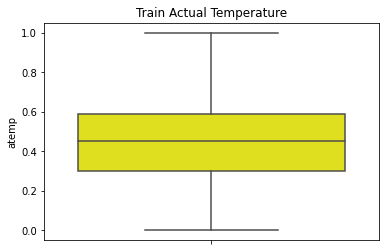

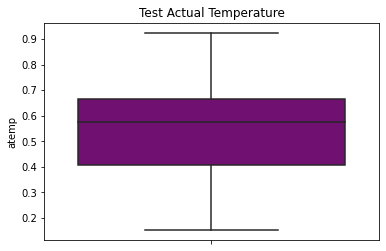

In [ ]:
sns.boxplot(y = df1['atemp'],color= 'yellow')
plt.title('Train Actual Temperature')
plt.show()
sns.boxplot(y = df['atemp'],color='purple')
plt.title('Test Actual Temperature')
plt.show()

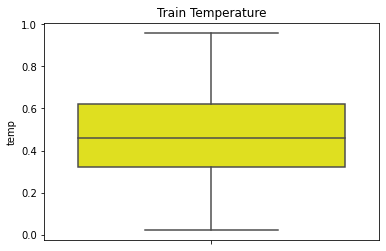

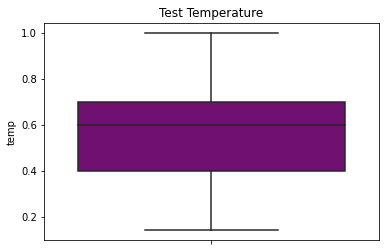

In [ ]:
sns.boxplot(y = df1['temp'],color= 'yellow')
plt.title('Train Temperature')
plt.show()
sns.boxplot(y = df['temp'],color='purple')
plt.title('Test Temperature')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


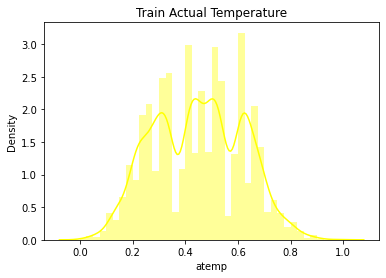

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


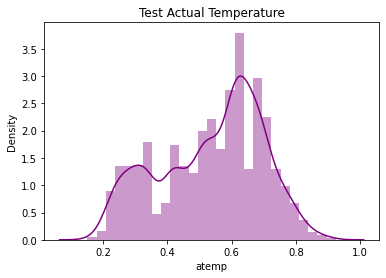

In [ ]:
sns.distplot(df1['atemp'], color='yellow')
plt.title('Train Actual Temperature')
plt.show()
sns.distplot(df['atemp'], color='purple')
plt.title('Test Actual Temperature')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


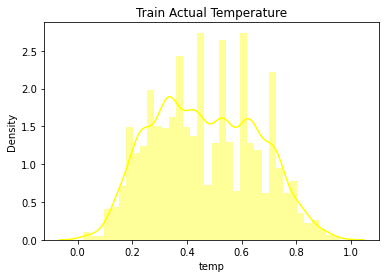

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


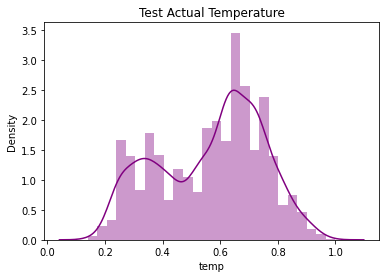

In [ ]:
sns.distplot(df1['temp'], color='yellow')
plt.title('Train Actual Temperature')
plt.show()
sns.distplot(df['temp'], color='purple')
plt.title('Test Actual Temperature')
plt.show()

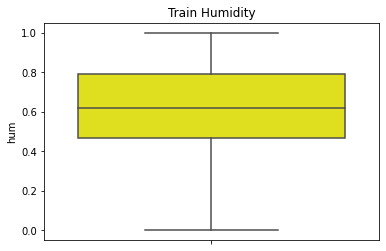

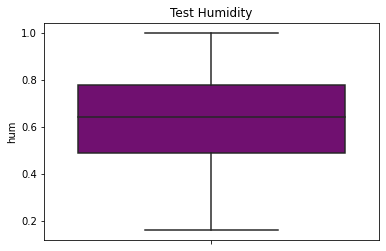

In [ ]:
sns.boxplot(y = df1['hum'],color='yellow')
plt.title('Train Humidity')
plt.show()
sns.boxplot(y = df['hum'],color='purple')
plt.title('Test Humidity')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


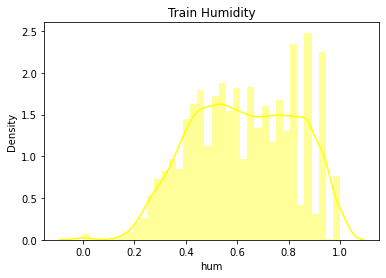

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


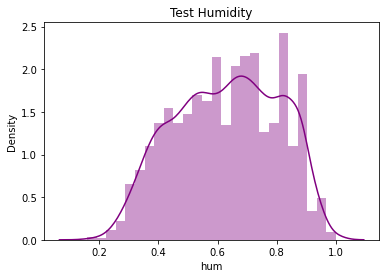

In [ ]:
sns.distplot(df1['hum'],color='yellow')
plt.title('Train Humidity')
plt.show()
sns.distplot(df['hum'],color='purple')
plt.title('Test Humidity')
plt.show()

Hasta aqui se observan diferencias pero no significativas, se descartan outliers en humedad, temperatura y sensaciòn termica

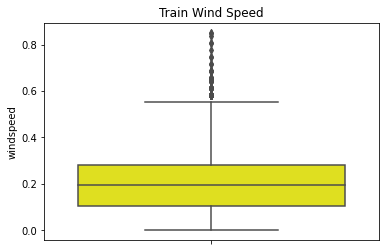

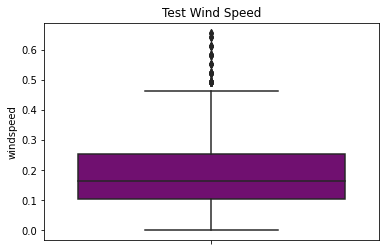

In [ ]:
sns.boxplot(y = df1['windspeed'],color='yellow')
plt.title('Train Wind Speed')
plt.show()
sns.boxplot(y = df['windspeed'],color='purple')
plt.title('Test Wind Speed')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


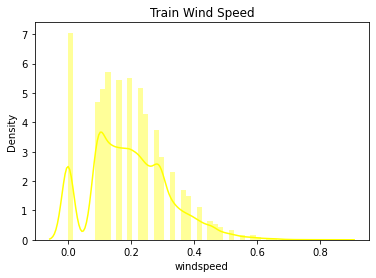

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


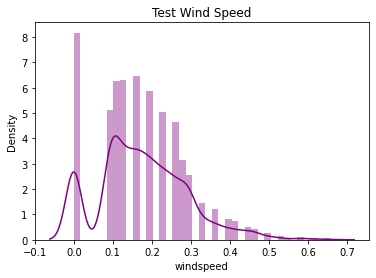

In [ ]:
sns.distplot(df1['windspeed'],color='yellow')
plt.title('Train Wind Speed')
plt.show()
sns.distplot(df['windspeed'], color= 'purple')
plt.title('Test Wind Speed')
plt.show()

Aqui se observa que existen outliers, tanto en el histograma como en el gràfico de cajas de observa que los datos estan exacerbados en el puntaje 0.0 de windspeed tantos en los datos de prueba como en los de entrenamiento, tratare de corregir este error

In [ ]:
wind_df1 = [] #armo una lista vacia que contendra los datos normalizados, arranco por los datos de entrenamiento
for i in df1['windspeed']: #recorremos cada valor de la columna windspeed
    if i < (df1['windspeed'].mean() - (2 * df1['windspeed'].std())): #si i es menor o mayor que la media menos dos veces la desviacion estandar entonces
        wind_df1.append(df1['windspeed'].mean() - (2 * df1['windspeed'].std())) #lo normalizamos, lo reemplazamos por un dato que sea 2 veces mas o menos la desviaciòn estandar y lo agregamos a la lista
    elif i > (df1['windspeed'].mean() + (2 * df1['windspeed'].std())): 
        wind_df1.append(df1['windspeed'].mean() + (2 * df1['windspeed'].std()))
    else:
        wind_df1.append(i)
df1['windspeed'] = wind_df1 #reemplazmos los valores normalizados en la columna de interes


In [ ]:

#este procedimiento tambièn lo repetimos en datos de test
wind_df = []
for j in df['windspeed']:
    if j < (df['windspeed'].mean() - (2 * df['windspeed'].std())):
        wind_df.append(df['windspeed'].mean() - (2 * df['windspeed'].std()))
    elif j > (df['windspeed'].mean() + (2 * df['windspeed'].std())):
        wind_df.append(df['windspeed'].mean() + (2 * df['windspeed'].std()))
    else:
        wind_df.append(j)
df['windspeed'] = wind_df

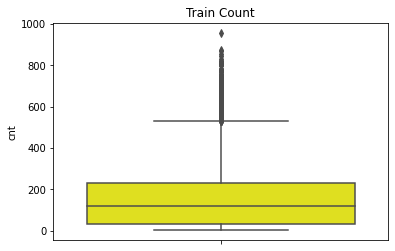

In [ ]:
sns.boxplot(y = df1['cnt'],color='yellow')
plt.title('Train Count')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


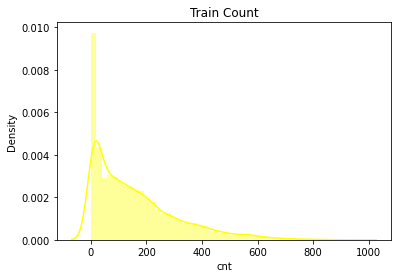

In [ ]:
sns.distplot(df1['cnt'],color='yellow')
plt.title('Train Count')
plt.show()

En estos datos tambien se observa la presencia de outliers, realizare el mismo procedimiento realizado anteriormente (en windspeed)

In [ ]:
count_df1 = [] #armamos una lista vacia que va a contener nuestros valores normalizados
for i in df1['cnt']: #recorremos cada valor de la columna cnt
    if i < (df1['cnt'].mean() - (2 * df1['cnt'].std())): #si i es menor a la media menos dos veces la desviaciòn estandar entonces
        count_df1.append(df1['cnt'].mean() - (2 * df1['cnt'].std())) #reemplazamos ese valor por la media menos dos veces la desviaciòn estandar
    elif i > (df1['cnt'].mean() + (2 * df1['cnt'].std())): #si i es mayor a la media menos dos veces la desviaciòn estandar
        count_df1.append(df1['cnt'].mean() + (2 * df1['cnt'].std())) #entonces reemplazamos ese valor por la media mas dos veces la desviaciòn estandar
    else:
        count_df1.append(i)
df1['cnt'] = count_df1 #reemplazamos los valores normalizados en la columna de interes

## Ahora vamos a realizar la eleccin de features, a escalar los datos y a crear features nuevas

In [100]:
#ahora vamosa borrar la columna dteday(solo de los datos de train), atemp(repite lo que esta en temp pero reescalado por ello es que da tan alta la correlacion) e instant puesto que no trae ninguna informacion relevante, ya que tenemos columnas especificas de año, mes, dia de la semana y h ora
df1.drop(['dteday','instant','atemp'],axis=1,inplace=True)

df.drop(['instant','atemp'],axis=1,inplace=True) 


In [101]:
df.shape,df1.shape

((5380, 12), (11999, 14))

In [102]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [ ]:
df1.columns

Index(['season', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit', 'atemp',
       'hum', 'casual', 'registered', 'cnt'],
      dtype='object')

en base al analisis anterior de los datos se determina que los datos contenidos en windspeed, weekday, yr(year) no son relevantes para nuestro analisis por lo cual los borrare de ambos registros con el fin de reducir dimensionalidad

In [103]:
df1.drop(['windspeed','weekday','yr'],axis=1,inplace=True)
df.drop(['windspeed','weekday','yr'],axis=1,inplace=True)

In [ ]:
import seaborn as sns

<AxesSubplot:>

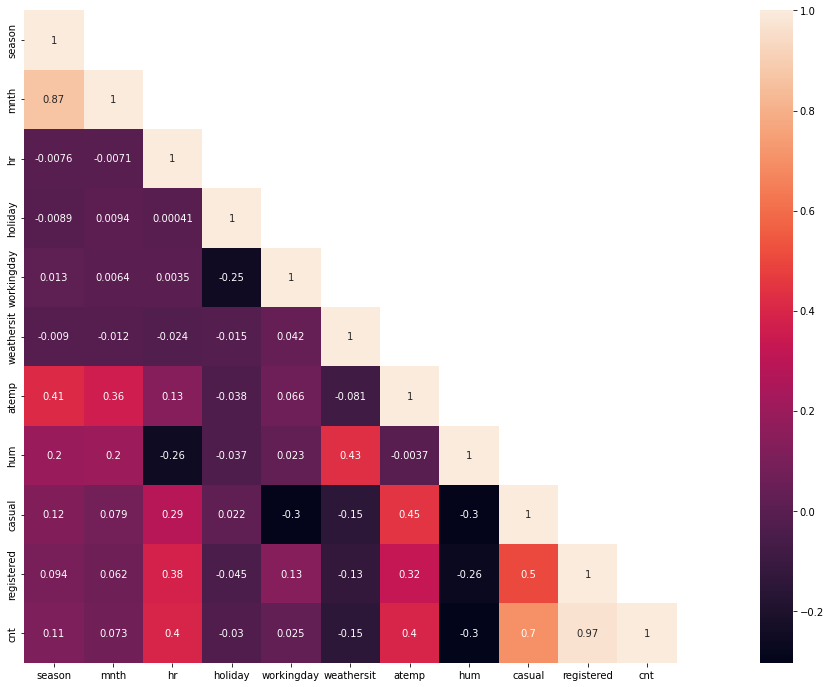

In [ ]:
#volvemos a graficar el heatmap para ver como nos quedo ahora
cor_mat= df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [104]:
#vamos a borrar la columna
df1.drop(['casual','registered'],axis=1,inplace=True) #me quedo solo con count puesto que traer sumado casual y registered
#df1.drop(['cnt','registered'],axis=1,inplace=True)

 

In [105]:
df1_fin = pd.get_dummies(df1, columns=['season', 'workingday','holiday','hr'])
df1_fin.columns

Index(['mnth', 'weathersit', 'temp', 'hum', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'workingday_0', 'workingday_1', 'holiday_0',
       'holiday_1', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

In [106]:
df_fin= pd.get_dummies(df, columns=['season', 'workingday','holiday', 'hr'])
df_fin.columns

Index(['dteday', 'mnth', 'weathersit', 'temp', 'hum', 'season_1', 'season_2',
       'season_3', 'season_4', 'workingday_0', 'workingday_1', 'holiday_0',
       'holiday_1', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

In [107]:
df1_train= df1['cnt']


## Vamos a modelar los datos, y a elegir el mejor modelo para nuestros datos 

In [108]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(df1_fin, df1_train, test_size=0.35, random_state=4200)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((7799, 37), (4200, 37), (7799,), (4200,))

In [109]:
#importamos los algoritmos necesarios para hacer nuestros modelos

#regresion
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#metrica que va evaluar el desempeño de nuestro modelo
from sklearn.metrics import mean_squared_error


In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Evaluamos cual es el mejor modelo

In [110]:
#model=RandomForestRegressor(n_estimators=500,random_state=40)  score 0.97, rmse 47 
#model=RandomForestRegressor(n_estimators=1000,random_state=40) score 0.98, rmse 47.61 
#model=RandomForestRegressor(n_estimators=1500,random_state=40) #score 0.98, rmse 47.60 
model=RandomForestRegressor(n_estimators=2000,random_state=40, max_depth=15)

In [111]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=2000, random_state=40)

In [112]:
prediccionrf=model.predict(X_validation)

In [113]:
scorerf= model.score(X_validation, y_validation)
scorerf

0.9998569699689748

In [150]:
print((mean_squared_error(prediccionrf,y_validation,squared=False)))


1.7894552113901672


In [116]:
ada_reg=AdaBoostRegressor(n_estimators=2000, random_state=40)

In [117]:
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=2000, random_state=40)

In [118]:
prediccionab=ada_reg.predict(X_validation)

In [119]:
scoreab= ada_reg.score(X_validation, y_validation)
scoreab

0.9935085245513741

In [148]:
print((mean_squared_error(prediccionab,y_validation,squared=False)))

12.05532507809963


Aqui tanto el score como el rmse son inferiores en cual al rendimiento respecto a Randomforest, por lo cual queda descardatado

In [122]:
LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [131]:
prediccionlr= LR.predict(X_validation)
scorelr=LR.score(X_validation, y_validation)
scorelr

1.0

In [147]:
print(mean_squared_error(prediccionlr,y_validation,squared=False))

9.028967256782266e-14


Vemos que la regresion lineal tampoco es viable ya que sus indices de rendimiento son muy bajos

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [135]:
model_gbm = GradientBoostingRegressor(n_estimators=500)

In [136]:
model_gbm.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=500)

In [137]:
predicciongb=model_gbm.predict(X_validation)

In [146]:
scoregb= model_gbm.score(X_validation, y_validation)
scoregb

0.9998923635294825

In [139]:
print((mean_squared_error(predicciongb,y_validation,squared=False)))

1.5523403299350353


In [140]:
model_lgbm = LGBMRegressor(n_estimators=500)

In [141]:
model_lgbm.fit(X_train,y_train)

LGBMRegressor(n_estimators=500)

In [142]:
prediccionlg=model_lgbm.predict(X_validation)

In [143]:
scorelg= model_lgbm.score(X_validation, y_validation)
scorelg

0.9993632310616049

In [144]:
print((mean_squared_error(prediccionlg,y_validation,squared=False)))

3.7757058392466503


In [152]:
#Importamos el modelo xgboost
import xgboost as xgb

In [153]:
#instanciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [154]:
model_xgb.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571, silent=1,
             subsample=0.5213)

In [155]:
prediccionxg=model_xgb.predict(X_validation)

In [156]:
scorexg= model_xgb.score(X_validation, y_validation)
scorexg

0.9994159477105097

In [157]:
print((mean_squared_error(prediccionxg,y_validation,squared=False)))


3.6160387996668786


Se observa que el modelo con mejor score y rmse es gradientboosting, por lo cual decido quedarme con este modelo, procedo a guardarlo

In [178]:
predicciongb

array([ 62.48406036,  45.08380659,  83.71595864, ..., 331.4753321 ,
       382.30975375, 565.27550625])

In [179]:
prediccion_final1 = np.round(predicciongb, 0)
prediccion_final1

array([ 62.,  45.,  84., ..., 331., 382., 565.])

In [180]:
resultado = pd.DataFrame(prediccion_final1)
resultado.rename(columns={0:'pred'}, inplace=True)

In [181]:
resultado

pred
0      62.0
1      45.0
2      84.0
3      11.0
4      76.0
...     ...
4195  525.0
4196   53.0
4197  331.0
4198  382.0
4199  565.0

[4200 rows x 1 columns]

In [182]:
resultado.to_csv('susanje.csv',index=False)

In [177]:
from google.colab import files
files.download("susanje.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>